<a href="https://colab.research.google.com/github/pa-shk/coursework/blob/main/coursework_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount(r"/content/drive/")

Mounted at /content/drive/


In [ ]:
WORKING_DIRECTORY = r"/content/drive/MyDrive/coursework"

In [ ]:
pd.set_option("display.max_columns", None)
sns.set(font_scale=1.3)

# Data preprocessing

In [ ]:
data = pd.read_json(os.path.join(WORKING_DIRECTORY, "velo.json"))
data

,name,type,id,messages
0,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 1, 'type': 'service', 'date': '2017-03-..."
1,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 4, 'type': 'service', 'date': '2017-03-..."
2,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 5, 'type': 'message', 'date': '2017-03-..."
3,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 6, 'type': 'message', 'date': '2017-03-..."
4,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 7, 'type': 'message', 'date': '2017-03-..."
...,...,...,...,...
521063,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596685, 'type': 'message', 'date': '202..."
521064,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596686, 'type': 'message', 'date': '202..."
521065,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596687, 'type': 'message', 'date': '202..."
521066,ВелоЧат 🚵‍♂️💨,public_supergroup,1118817811,"{'id': 596688, 'type': 'message', 'date': '202..."


In [ ]:
messages_df = pd.json_normalize(data.messages)
messages_df

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,members,from,from_id,reply_to_message_id,photo,width,height,file,thumbnail,media_type,sticker_emoji,edited,edited_unixtime,forwarded_from,mime_type,duration_seconds,location_information.latitude,location_information.longitude,message_id,performer,inviter,via_bot,game_message_id,score,game_title,game_description,game_link,poll.question,poll.closed,poll.total_voters,poll.answers,live_location_period_seconds,saved_from,duration
0,1,service,2017-03-10T03:59:09,1489107549,ВелоЧат 🚵‍♂️💨,channel1118817811,migrate_from_group,Велолюбители Дзержинска,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,service,2017-03-11T19:59:29,1489251569,Alexey S,user107515585,invite_members,NaN,,[],[Alexey S],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,message,2017-03-11T20:01:06,1489251666,NaN,NaN,NaN,NaN,Привет первому 😄👍,"[{'type': 'plain', 'text': 'Привет первому 😄👍'}]",NaN,D Egorof,user92911163,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,message,2017-03-11T20:01:43,1489251703,NaN,NaN,NaN,NaN,Привет!,"[{'type': 'plain', 'text': 'Привет!'}]",NaN,Alexey S,user107515585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,message,2017-03-11T20:23:55,1489253035,NaN,NaN,NaN,NaN,Из Дзержинска?,"[{'type': 'plain', 'text': 'Из Дзержинска?'}]",NaN,D Egorof,user92911163,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521063,596685,message,2023-01-11T22:47:06,1673466426,NaN,NaN,NaN,NaN,По факту,"[{'type': 'plain', 'text': 'По факту'}]",NaN,Глеб,user979403883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521064,596686,message,2023-01-11T22:47:38,1673466458,NaN,NaN,NaN,NaN,"Пойду-ка я тоже чайку накачу, авось и меня про...","[{'type': 'plain', 'text': 'Пойду-ка я тоже ча...",NaN,Olegin_75,user171284469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521065,596687,message,2023-01-11T22:47:54,1673466474,NaN,NaN,NaN,NaN,это как я и gt.\nпусть там gt сделают самый ох...,"[{'type': 'plain', 'text': 'это как я и gt. пу...",NaN,Евген,user976152764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521066,596688,message,2023-01-12T02:19:45,1673479185,NaN,NaN,NaN,NaN,Капец зашел с утра в велочат а тут больше 300 ...,"[{'type': 'plain', 'text': 'Капец зашел с утра...",NaN,Hon GilDon,user375683581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
messages_df = messages_df[messages_df.forwarded_from.isnull()]
messages_df.shape

(515556, 44)

In [ ]:
messages_df = messages_df[["from_id", "text"]]
messages_df

,from_id,text
0,NaN,
1,NaN,
2,user92911163,Привет первому 😄👍
3,user107515585,Привет!
4,user92911163,Из Дзержинска?
...,...,...
521063,user979403883,По факту
521064,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про..."
521065,user976152764,это как я и gt.\nпусть там gt сделают самый ох...
521066,user375683581,Капец зашел с утра в велочат а тут больше 300 ...


In [ ]:
messages_df.rename(columns={"from_id": "id"}, inplace=True)

In [ ]:
def count_words(sentence):
    if not isinstance(sentence, str):
        return 0
    return len(sentence.split())

In [ ]:
messages_df["words_count"] = messages_df.text.map(count_words)
messages_df

,id,text,words_count
0,NaN,,0
1,NaN,,0
2,user92911163,Привет первому 😄👍,3
3,user107515585,Привет!,1
4,user92911163,Из Дзержинска?,2
...,...,...,...
521063,user979403883,По факту,2
521064,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про...",30
521065,user976152764,это как я и gt.\nпусть там gt сделают самый ох...,25
521066,user375683581,Капец зашел с утра в велочат а тут больше 300 ...,13


In [ ]:
messages_df = messages_df[messages_df["words_count"] > 10]
messages_df.reset_index(drop=True, inplace=True)
messages_df

,id,text,words_count
0,user92911163,Да как то Страва не рекламируется в пабликах в...,12
1,user92911163,Мне друг рассказал про страву) не помню уже ко...,15
2,user92911163,"Бесит, что в современном мире во всем нужно ра...",596
3,user92911163,"нстаграме. Профиль открыт, последняя фотографи...",615
4,user92911163,"ром. Кстати, ты ведь давно хотел приобрести хо...",32
...,...,...,...
98269,user979403883,Да просто не понимаю зачем ты мусолишь одну и ...,15
98270,user171284469,"Пойду-ка я тоже чайку накачу, авось и меня про...",30
98271,user976152764,это как я и gt.\nпусть там gt сделают самый ох...,25
98272,user375683581,Капец зашел с утра в велочат а тут больше 300 ...,13


In [ ]:
messages_df.isna().sum()

id             0
text           0
words_count    0
dtype: int64

In [ ]:
active = messages_df["id"].value_counts().nlargest(n=20, keep="all")
active

user210988160     11691
user404974250     10976
user197894952      8423
user171284469      6949
user126315380      5638
user550802873      4082
user352873749      3131
user976152764      2888
user130711673      2441
user329716845      1691
user1044319687     1544
user385570172      1380
user224684962      1121
user421178130      1067
user1053614038     1061
user4180997        1037
user301581509       965
user501890406       960
user47850071        835
user307522483       832
Name: id, dtype: int64

In [ ]:
new_id = dict(zip(active.keys(), range(len(active) + 1)))
new_id

{'user210988160': 0,
 'user404974250': 1,
 'user197894952': 2,
 'user171284469': 3,
 'user126315380': 4,
 'user550802873': 5,
 'user352873749': 6,
 'user976152764': 7,
 'user130711673': 8,
 'user329716845': 9,
 'user1044319687': 10,
 'user385570172': 11,
 'user224684962': 12,
 'user421178130': 13,
 'user1053614038': 14,
 'user4180997': 15,
 'user301581509': 16,
 'user501890406': 17,
 'user47850071': 18,
 'user307522483': 19}

In [ ]:
active_df = messages_df.loc[messages_df.id.isin(active.keys())]
active_df = active_df.copy()
active_df.reset_index(inplace=True, drop=True)
active_df.replace({"id": new_id}, inplace=True)
active_df

,id,text,words_count
0,0,"Всем привет, г.Чебоксары. Велосипед еще в проц...",13
1,16,"Потому что я войсил, и из-за этого багался бот...",18
2,16,Fire Eye Broil еще вот эти можешь чекнуть. Они...,11
3,16,Смотрю обзоры разные на польском. Так забавно....,22
4,16,"Хахахах, Поздравляю с преобретением. Ты потырк...",20
...,...,...,...
68707,3,Масла в огонь вам не подкинуть ? \nНе списывай...,13
68708,7,"поздравляю тебя с этим, я сразу обозначил то, ...",13
68709,7,"наверняка за тем же, зачем ты мне тут выше вся...",12
68710,3,"Пойду-ка я тоже чайку накачу, авось и меня про...",30


In [ ]:
active_df["words_count"] = active_df["text"].map(count_words)
active_df["characters_count"] = active_df["text"].map(len)
active_df

,id,text,words_count,characters_count
0,0,"Всем привет, г.Чебоксары. Велосипед еще в проц...",13,91
1,16,"Потому что я войсил, и из-за этого багался бот...",18,109
2,16,Fire Eye Broil еще вот эти можешь чекнуть. Они...,11,59
3,16,Смотрю обзоры разные на польском. Так забавно....,22,141
4,16,"Хахахах, Поздравляю с преобретением. Ты потырк...",20,126
...,...,...,...,...
68707,3,Масла в огонь вам не подкинуть ? \nНе списывай...,13,67
68708,7,"поздравляю тебя с этим, я сразу обозначил то, ...",13,74
68709,7,"наверняка за тем же, зачем ты мне тут выше вся...",12,62
68710,3,"Пойду-ка я тоже чайку накачу, авось и меня про...",30,178


In [ ]:
active_statistics = active_df.groupby("id").agg(number_of_messages=("id", "count"),
                                                total_number_of_words=("words_count", "sum"),
                                                mean_len_in_words=("words_count", "mean"),
                                                mean_len_in_characters=("characters_count", "mean"),
                                                min_len_in_characters=("characters_count", "min")).round(1)
active_statistics

In [ ]:
active_df.characters_count.mean()

112.08225637443242

In [ ]:
for id in np.unique(active_df.id.values):
    user = active_df.loc[active_df.id == id]
    user_sample = user.sample(100, random_state=1)
    with open(os.path.join(WORKING_DIRECTORY, f"user_{id + 1}.txt"), "w", encoding="utf-8") as file:
        file.write("\n\n".join(user_sample.text.values))

In [ ]:
active_df

,id,text,words_count,characters_count
0,0,"Всем привет, г.Чебоксары. Велосипед еще в проц...",13,91
1,16,"Потому что я войсил, и из-за этого багался бот...",18,109
2,16,Fire Eye Broil еще вот эти можешь чекнуть. Они...,11,59
3,16,Смотрю обзоры разные на польском. Так забавно....,22,141
4,16,"Хахахах, Поздравляю с преобретением. Ты потырк...",20,126
...,...,...,...,...
68707,3,Масла в огонь вам не подкинуть ? \nНе списывай...,13,67
68708,7,"поздравляю тебя с этим, я сразу обозначил то, ...",13,74
68709,7,"наверняка за тем же, зачем ты мне тут выше вся...",12,62
68710,3,"Пойду-ка я тоже чайку накачу, авось и меня про...",30,178


In [ ]:
active_df.to_csv(os.path.join(WORKING_DIRECTORY, "velo_processed.csv"), index=False)

# Machine learning

In [ ]:
def show_eval_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  cf_matrix = confusion_matrix(y_true, y_pred, normalize="true") 
  plt.figure(figsize = (10, 8))
  sns.heatmap(cf_matrix)

In [ ]:
data = pd.read_csv(os.path.join(WORKING_DIRECTORY, "velo_processed.csv"))
SEED = 1

##BOW + LogReg

### Data preprocessing

In [ ]:
X = data["text"].values
y = data["id"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, y_train

(array(['только как я уже говорил срам идет в спицы только если цепь слетает, а сенсах в процессе работы',
        'но на руль еще не пришла, так что это пока еще теория)',
        'Потому что в России всё через жопу и вечная надежда на авось. Там в фуре какие-нибудь коробки стояли, дверь открыли, посмотрели и отпустили. Потому что таких фур тысячи',
        ...,
        'не считая норки там катить его тяжко было и пульс тоже не маленький',
        'Есть режим прозрачности. Подносишь руку к правому уху и слышишь все звуки снаружи',
        'ты просто лось)) да и проф.спортсменов у вас наверное нет 😉 тем более на шоссерах'],
       dtype=object), array([2, 0, 4, ..., 5, 4, 0]))

### Model training

In [ ]:
clf = make_pipeline(CountVectorizer(max_features=20_000), LogisticRegression(random_state=SEED))
parameters = [
    {
        "countvectorizer__ngram_range" : [(1, 2), (1, 3), (2, 3)],
        "countvectorizer__lowercase" : [True, False],
        "countvectorizer__analyzer" : ["word"]
    },
    {
        "countvectorizer__ngram_range" : [(2, 3), (3, 4), (4, 6)],
        "countvectorizer__lowercase" : [True, False],
        "countvectorizer__analyzer" : ["char"]
    }
] 

clf_grid = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, refit=True)

In [ ]:
%%time
clf_grid.fit(X_train, y_train)

CPU times: user 1min 23s, sys: 23.3 s, total: 1min 46s
Wall time: 23min 41s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=20000)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'countvectorizer__analyzer': ['word'],
                          'countvectorizer__lowercase': [True, False],
                          'countvectorizer__ngram_range': [(1, 2), (1, 3),
                                                           (2, 3)]},
                         {'countvectorizer__analyzer': ['char'],
                          'countvectorizer__lowercase': [True, False],
                          'countvectorizer__ngram_range': [(2, 3), (3, 4),
                                                           (4, 6)]}])

In [ ]:
clf_grid.best_params_

{'countvectorizer__analyzer': 'char',
 'countvectorizer__lowercase': False,
 'countvectorizer__ngram_range': (2, 3)}

In [ ]:
clf_grid.best_score_

0.6580618166602995

###Model saving

In [ ]:
with open(os.path.join(WORKING_DIRECTORY, "clf_grid"), "wb") as model_file:
  pickle.dump(clf_grid, model_file)

In [ ]:
with open(os.path.join(WORKING_DIRECTORY, "clf_grid"), "rb") as model_file:
  clf_grid = pickle.load(model_file)

### Model evaluation

In [ ]:
y_pred = clf_grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2290
           1       0.76      0.80      0.78      2200
           2       0.65      0.77      0.70      1705
           3       0.80      0.90      0.85      1400
           4       0.60      0.63      0.62      1076
           5       0.80      0.83      0.82       805
           6       0.45      0.41      0.43       672
           7       0.55      0.51      0.53       591
           8       0.61      0.47      0.53       499
           9       0.62      0.57      0.60       360
          10       0.46      0.39      0.42       319
          11       0.52      0.41      0.46       293
          12       0.51      0.47      0.49       206
          13       0.66      0.47      0.55       215
          14       0.51      0.45      0.48       207
          15       0.41      0.33      0.37       193
          16       0.60      0.40      0.48       203
          17       0.50    

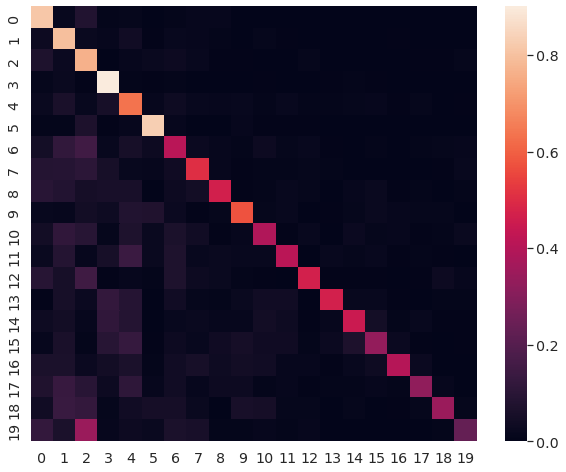

In [ ]:
show_eval_report(y_test, y_pred)

In [ ]:
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report = report.iloc[0:20, :-1]
report.index = report.index.astype(int)
report = pd.concat([active_statistics, report], axis=1, join="inner")
report

,total_number_of_words,number_of_messages,mean_len_in_words,mean_len_in_characters,precision,recall,f1-score
0,226704,11691,19.391327,112.187324,0.796581,0.813974,0.805184
1,208032,10976,18.953353,108.203535,0.760643,0.795909,0.777876
2,127939,8423,15.189244,84.220230,0.653153,0.765396,0.704834
3,225663,6949,32.474169,191.488560,0.798101,0.900714,0.846309
4,91775,5638,16.277935,93.931713,0.601762,0.634758,0.617820
5,75427,4082,18.477952,98.945860,0.798570,0.832298,0.815085
6,47895,3131,15.297030,89.686682,0.453795,0.409226,0.430360
7,55774,2888,19.312327,110.624307,0.554731,0.505922,0.529204
8,50512,2441,20.693159,122.947153,0.608355,0.466934,0.528345
9,28597,1691,16.911295,94.170313,0.623494,0.575000,0.598266


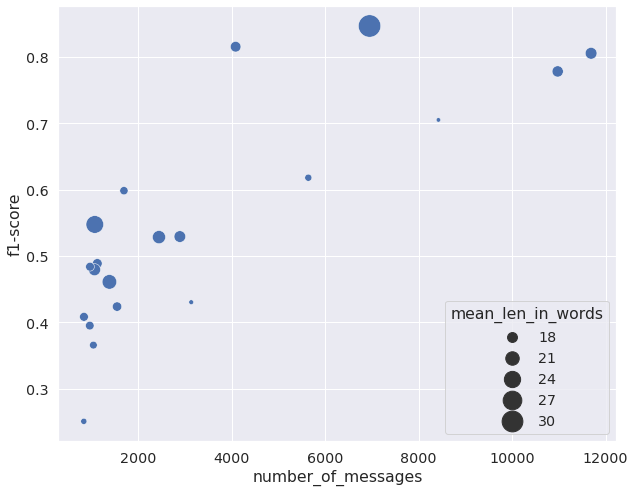

In [ ]:
plt.figure(figsize = (10, 8))
graph = sns.scatterplot(data=report, 
                x="number_of_messages", 
                y="f1-score", 
                size="mean_len_in_words",
                sizes=(20, 500))

sns.move_legend(graph, "lower right")

##Fasttext

### Installation and import

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4394832 sha256=85fe33ae413b2cda3d66bdd3fe7f82dd58507084a1319fefe5ed9864e3505f21
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:
import fasttext
from fasttext.FastText import load_model

### Data preprocessing

Prepare data in the format reqired by fasttext classifier

In [ ]:
df = data.loc[:, ["id", "text"]]

In [ ]:
df.id = df.id.map(lambda x: f"__label__{x}") 
df.text = df.text.str.replace("\n", " ")

In [ ]:
df

,id,text
0,__label__0,"Всем привет, г.Чебоксары. Велосипед еще в проц..."
1,__label__16,"Потому что я войсил, и из-за этого багался бот..."
2,__label__16,Fire Eye Broil еще вот эти можешь чекнуть. Они...
3,__label__16,Смотрю обзоры разные на польском. Так забавно....
4,__label__16,"Хахахах, Поздравляю с преобретением. Ты потырк..."
...,...,...
68707,__label__3,Масла в огонь вам не подкинуть ? Не списывайт...
68708,__label__7,"поздравляю тебя с этим, я сразу обозначил то, ..."
68709,__label__7,"наверняка за тем же, зачем ты мне тут выше вся..."
68710,__label__3,"Пойду-ка я тоже чайку накачу, авось и меня про..."


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=SEED)

In [ ]:
y_test = test_df.id
X_test = test_df.text

In [ ]:
train_df.to_csv(os.path.join(WORKING_DIRECTORY, "train_data"), 
                index=False,
                header=False, 
                sep=" ")

val_df.to_csv(os.path.join(WORKING_DIRECTORY, "val_data"), 
              index=False, 
              header=False,
              sep=" ")

### Model training

Train model with  hyperparameter auto-tuning during 10 minutes

In [ ]:
fasttext_clf = fasttext.train_supervised(input=os.path.join(WORKING_DIRECTORY, "train_data"),
                                         autotuneValidationFile=os.path.join(WORKING_DIRECTORY, "val_data"), 
                                         autotuneDuration=600)

### Model saving

In [ ]:
fasttext_clf.save_model(os.path.join(WORKING_DIRECTORY, "fasttext_clf.bin"))

In [ ]:
fasttext_clf = fasttext.FastText.load_model(os.path.join(WORKING_DIRECTORY, "fasttext_clf.bin"))

### Model evaluation

Convert labels to the intial form

In [ ]:
y_pred = X_test.map(lambda x: fasttext_clf.predict(x)[0][0])
y_test = y_test.str.extract(r"(\d+)").astype(int)
y_pred = y_pred.str.extract(r"(\d+)").astype(int)

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      2290
           1       0.69      0.64      0.66      2200
           2       0.67      0.57      0.62      1705
           3       0.74      0.76      0.75      1400
           4       0.45      0.57      0.50      1076
           5       0.78      0.67      0.72       805
           6       0.32      0.26      0.29       672
           7       0.35      0.42      0.38       591
           8       0.28      0.40      0.33       499
           9       0.43      0.47      0.45       360
          10       0.37      0.27      0.31       319
          11       0.32      0.28      0.30       293
          12       0.42      0.33      0.37       206
          13       0.35      0.39      0.37       215
          14       0.32      0.36      0.34       207
          15       0.21      0.28      0.24       193
          16       0.29      0.27      0.28       203
          17       0.26    

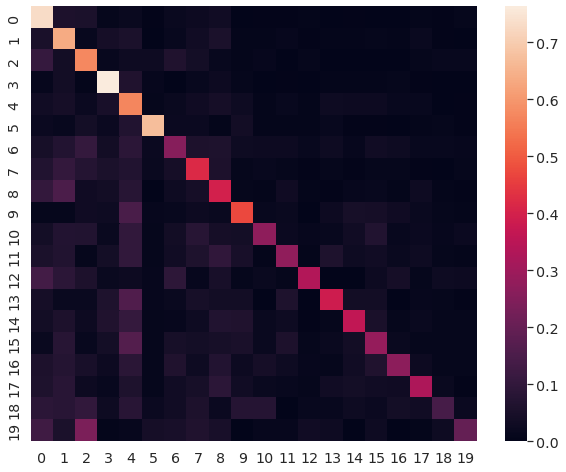

In [ ]:
show_eval_report(y_test, y_pred)

## Catboost

### Installation and import

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.3 MB/s eta 0:00:00


In [ ]:
from catboost import Pool, CatBoostClassifier

### Data preprocessing

Split data into train, validation and test sets

In [ ]:
X = data.iloc[:, 1:]
y = data["id"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

Create training and validation Pools

In [ ]:
train_pool = Pool(X_train, 
                  y_train, 
                  text_features=["text"], 
                  feature_names=list(X_train.columns))

valid_pool = Pool(X_val, 
                  y_val, 
                  text_features=["text"], 
                  feature_names=list(X_val.columns))

###Model training

Initialize tokenizers

In [ ]:
space_tokenizer = {"tokenizer_id" : "Space",
                   "separator_type" : "ByDelimiter",
                   "delimiter" : " ",}

sense_tokenizer = {"tokenizer_id" : "Sense",
                   "separator_type" : "BySense",
                   "languages" : ["russian"]}

sense_tokenizer_punct_num = {"tokenizer_id" : "SensePunctNum",
                             "separator_type" : "BySense",
                             "token_types": ["Number", "Punctuation", "SentenceBreak"],
                             "languages" : ["russian"]}

tokenizers = [space_tokenizer, sense_tokenizer, sense_tokenizer_punct_num]

Create dictionaries with different ranges of n-grams

In [ ]:
dictionaries = []
dictionaries_names = []

for i in range(6):
  dict_name = f"{i + 1}_letters"
  dictionary = {"dictionary_id": dict_name,
                "token_level_type": "Letter",
                "gram_order" : str(i + 1)}
  dictionaries.append(dictionary)
  dictionaries_names.append(dict_name)

for i in range(3):
  dict_name = f"{i + 1}_words"
  dictionary = {"dictionary_id": dict_name,
                "token_level_type": "Word",
                "gram_order" : str(i + 1)}
  dictionaries.append(dictionary)
  dictionaries_names.append(dict_name)

Add dictionaries with different skip steps

In [ ]:
skip_dictionaries = []
for dict_ in dictionaries:
  if int(dict_["gram_order"]) > 1:
    for skip_step in range(1, 3):
      skip_dictionary = dict_.copy()
      skip_dictionary["dictionary_id"] = f"{skip_dictionary['dictionary_id']}_skip_{skip_step}"
      skip_dictionary["skip_step"] = str(skip_step)
      skip_dictionaries.append(skip_dictionary)

dictionaries.extend(skip_dictionaries)

Combine all text processing steps

In [ ]:
feature_processing = {"default" : [{"dictionaries_names" : dictionaries_names,
                                    "feature_calcers" : ["BoW", "NaiveBayes", "BM25"],
                                    "tokenizers_names" : ["Space", "Sense", "SensePunctNum"]}]}


text_processing = {"tokenizers": tokenizers, 
                   "dictionaries": dictionaries,  
                   "feature_processing" : feature_processing}

text_processing

{'tokenizers': [{'tokenizer_id': 'Space',
   'separator_type': 'ByDelimiter',
   'delimiter': ' '},
  {'tokenizer_id': 'Sense',
   'separator_type': 'BySense',
   'languages': ['russian']},
  {'tokenizer_id': 'Sense_punct_num',
   'separator_type': 'BySense',
   'token_types': ['Number', 'Punctuation', 'SentenceBreak'],
   'languages': ['russian']}],
 'dictionaries': [{'dictionary_id': '1_letters',
   'token_level_type': 'Letter',
   'gram_order': '1'},
  {'dictionary_id': '2_letters',
   'token_level_type': 'Letter',
   'gram_order': '2'},
  {'dictionary_id': '3_letters',
   'token_level_type': 'Letter',
   'gram_order': '3'},
  {'dictionary_id': '4_letters',
   'token_level_type': 'Letter',
   'gram_order': '4'},
  {'dictionary_id': '5_letters',
   'token_level_type': 'Letter',
   'gram_order': '5'},
  {'dictionary_id': '6_letters',
   'token_level_type': 'Letter',
   'gram_order': '6'},
  {'dictionary_id': '1_words', 'token_level_type': 'Word', 'gram_order': '1'},
  {'dictionary_id'

In [ ]:
cat_clf = CatBoostClassifier(task_type="GPU" if torch.cuda.is_available() else "CPU",
                             iterations=10_000,
                             od_type = "Iter",
                             od_wait = 500,
                             eval_metric="TotalF1",
                             random_seed = SEED,
                             text_processing = text_processing)

In [ ]:
cat_clf.fit(train_pool,
            verbose=100,
            eval_set=valid_pool,
            use_best_model=True)

Learning rate set to 0.056337
0:	learn: 0.4512830	test: 0.4667999	best: 0.4667999 (0)	total: 405ms	remaining: 1h 7m 34s
100:	learn: 0.6567681	test: 0.6874400	best: 0.6874400 (100)	total: 30.9s	remaining: 50m 25s
200:	learn: 0.6929063	test: 0.7189311	best: 0.7189311 (200)	total: 1m 2s	remaining: 50m 49s
300:	learn: 0.7161857	test: 0.7370207	best: 0.7370207 (300)	total: 1m 31s	remaining: 49m 9s
400:	learn: 0.7297782	test: 0.7441383	best: 0.7444023 (399)	total: 1m 58s	remaining: 47m 7s
500:	learn: 0.7375842	test: 0.7485244	best: 0.7487892 (495)	total: 2m 22s	remaining: 44m 56s
600:	learn: 0.7434213	test: 0.7520064	best: 0.7520855 (598)	total: 2m 44s	remaining: 42m 58s
700:	learn: 0.7486437	test: 0.7530968	best: 0.7533528 (697)	total: 3m 7s	remaining: 41m 25s
800:	learn: 0.7521046	test: 0.7547208	best: 0.7547805 (798)	total: 3m 30s	remaining: 40m 12s
900:	learn: 0.7557356	test: 0.7570196	best: 0.7570196 (900)	total: 3m 51s	remaining: 39m
1000:	learn: 0.7588440	test: 0.7582662	best: 0.75835

### Model saving

In [ ]:
cat_clf.save_model(fname=os.path.join(WORKING_DIRECTORY, "cat_clf"),
                   export_parameters=None,
                   pool=train_pool)

In [ ]:
cat_clf = CatBoostClassifier()
cat_clf.load_model(os.path.join(WORKING_DIRECTORY, "cat_clf"))

### Model evaluation

In [ ]:
y_pred = cat_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2290
           1       0.83      0.91      0.87      2200
           2       0.75      0.85      0.79      1705
           3       0.93      0.96      0.94      1400
           4       0.69      0.77      0.72      1076
           5       0.86      0.87      0.87       805
           6       0.58      0.56      0.57       672
           7       0.80      0.70      0.75       591
           8       0.75      0.66      0.70       499
           9       0.74      0.70      0.72       360
          10       0.64      0.56      0.60       319
          11       0.70      0.55      0.61       293
          12       0.69      0.61      0.65       206
          13       0.86      0.72      0.78       215
          14       0.68      0.61      0.65       207
          15       0.64      0.58      0.60       193
          16       0.74      0.53      0.62       203
          17       0.72    

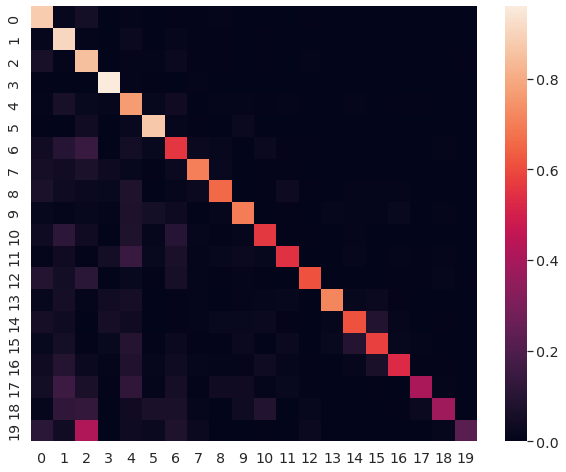

In [ ]:
show_eval_report(y_test, y_pred)

## Bert finetuning with SimpleTransformers

### Installation and import

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 832.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 

In [ ]:
from simpletransformers.classification import ClassificationModel

###Data preprocessing

Split data into train, validation and test sets

In [ ]:
df = data.rename(columns={"id": "labels"})
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
train_df, eval_df = train_test_split(train_df, test_size=0.2, random_state=SEED)

###Model training

Intialize the model

In [ ]:
train_args = {"num_train_epochs": 5,
             "evaluate_during_training": True,
             "evaluate_during_training_verbose": True,
             "early_stopping_delta": 0.01,
             "use_early_stopping": True,
             "overwrite_output_dir": True}


bert_clf = ClassificationModel("distilbert",
                               "DeepPavlov/distilrubert-small-cased-conversational",
                               num_labels=train_df.labels.nunique(),
                               args=train_args,
                               use_cuda=torch.cuda.is_available())

Some weights of the model checkpoint at DeepPavlov/distilrubert-small-cased-conversational were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/distilrubert-small-cased-conversational and are newly initialized: ['

In [ ]:
bert_clf.train_model(train_df=train_df, eval_df=eval_df)

  0%|          | 0/43975 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/5497 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/5497 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/5497 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/5497 [00:00<?, ?it/s]

  0%|          | 0/10994 [00:00<?, ?it/s]

(18000,
 defaultdict(list,
             {'global_step': [2000,
               4000,
               5497,
               6000,
               8000,
               10000,
               10994,
               12000,
               14000,
               16000,
               16491,
               18000],
              'train_loss': [1.5367279052734375,
               0.6581554412841797,
               0.5330859422683716,
               0.7268481254577637,
               0.9740447998046875,
               1.1878032684326172,
               0.8275642395019531,
               0.042887479066848755,
               0.14353051781654358,
               0.21473875641822815,
               0.5676408410072327,
               0.21053077280521393],
              'mcc': [0.5350511526795291,
               0.6028999956184723,
               0.6433558267542573,
               0.6452731962130623,
               0.6722994546519541,
               0.6800785040608148,
               0.6864137508382713,
      

### Model saving

In [ ]:
with open(os.path.join(WORKING_DIRECTORY, "bert_clf"), "wb") as model_file:
  torch.save(bert_clf, model_file)

In [ ]:
with open(os.path.join(WORKING_DIRECTORY, "bert_clf"), "rb") as model_file:
  bert_clf = torch.load(model_file)

### Model evaluation

In [ ]:
result, model_outputs, wrong_predictions = bert_clf.eval_model(test_df)

  0%|          | 0/13743 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1718 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.6997623875623389, 'eval_loss': 1.2279843214868944}

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2290
           1       0.80      0.88      0.84      2200
           2       0.78      0.75      0.76      1705
           3       0.85      0.90      0.87      1400
           4       0.65      0.69      0.67      1076
           5       0.67      0.70      0.69       805
           6       0.55      0.45      0.49       672
           7       0.78      0.51      0.62       591
           8       0.65      0.52      0.58       499
           9       0.74      0.71      0.73       360
          10       0.60      0.49      0.54       319
          11       0.48      0.58      0.53       293
          12       0.62      0.57      0.60       206
          13       0.62      0.60      0.61       215
          14       0.62      0.57      0.59       207
          15       0.60      0.52      0.56       193
          16       0.62      0.51      0.56       203
          17       0.61    

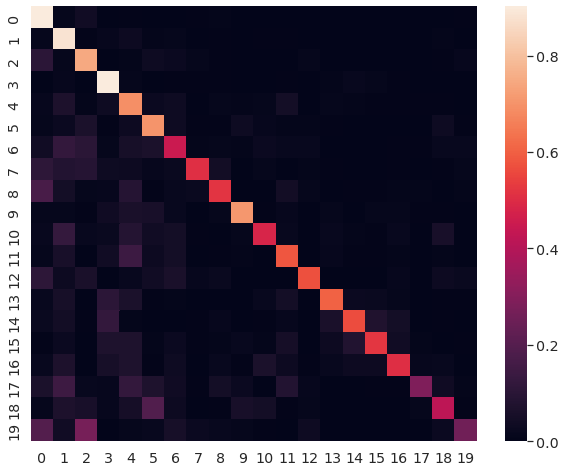

In [ ]:
y_test = test_df["labels"]
y_pred = np.argmax(model_outputs, axis=1)
show_eval_report(y_test, y_pred)

## Logistic regression and KNN classifiers over sentence embeddings from rubert-tiny2

### Installation and import

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.0 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModel

### Sentence embeddings

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")
if torch.cuda.is_available():
  model.cuda()

def embed_bert_cls(text):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
embeddings = data.text.map(embed_bert_cls).apply(pd.Series)

In [ ]:
embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311
0,0.103894,0.033625,-0.035785,-0.046338,0.025493,0.009133,-0.042121,-0.104182,0.013823,-0.033082,0.052019,0.015773,0.020750,-0.022347,0.008896,-0.074486,0.019269,-0.009654,0.002769,-0.000071,-0.029123,-0.021084,-0.018220,-0.057411,0.120759,0.033321,0.001876,0.002401,-0.009449,0.007173,0.000433,0.016406,0.008572,0.000312,-0.055090,-0.043783,-0.010326,-0.042149,0.092861,0.033151,0.027286,0.183202,0.077664,-0.033091,-0.070811,-0.062737,0.032765,-0.037512,-0.016105,-0.000396,0.004910,-0.055354,-0.006452,0.054251,-0.027824,0.006166,0.024710,0.072249,-0.047964,-0.051729,-0.019562,0.058273,0.046301,0.039731,0.020830,-0.035780,0.022541,0.000111,-0.000524,0.017901,-0.008809,0.020467,-0.136603,-0.022681,-0.039319,-0.029885,-0.005729,-0.039275,0.059993,0.039985,0.023833,0.090915,0.007308,0.001611,-0.000287,0.053259,0.055986,-0.074869,0.010457,0.003668,0.024572,-0.015954,0.007984,0.055471,-0.028505,0.011253,0.037051,-0.006040,-0.001741,-0.039567,0.010152,-0.014353,-0.010118,0.031263,0.025489,-0.003659,-0.010551,0.008598,0.039345,0.007188,-0.036169,-0.011203,0.027344,0.031830,0.087011,0.050636,-0.023369,0.011507,-0.054251,0.017206,0.048347,-0.136906,-0.017496,0.010048,0.050018,0.062341,0.103999,0.008719,-0.035239,0.053030,-0.042023,0.016193,-0.004198,0.013872,0.005632,-0.011261,-0.021117,0.053530,0.078664,0.003954,0.020885,-0.111398,0.022352,0.009578,-0.004062,-0.080539,0.023767,0.097398,0.123302,-0.009500,0.052959,0.045595,0.020560,-0.030522,-0.076775,-0.023033,-0.037133,0.007119,0.084096,-0.027184,0.009632,0.017544,0.058277,-0.148235,-0.003256,-0.069078,0.018064,-0.004644,-0.005385,0.029339,0.018490,0.106388,0.001288,0.040027,0.019403,-0.030250,0.010047,-0.059333,0.004097,0.037789,-0.039837,0.052296,0.076509,-0.001947,-0.048176,-0.001084,-0.024760,0.031437,0.071113,0.116501,0.072840,-0.011350,-0.016494,0.012041,0.102629,-0.471541,0.001106,0.010563,0.007809,-0.024088,-0.048454,0.001917,0.021610,0.002675,-0.229650,0.019110,0.065696,0.019156,0.038804,-0.055137,0.040213,0.006873,-0.059849,0.035205,-0.025043,0.005979,-0.034568,-0.051067,0.041084,-0.045945,0.017165,-0.009968,-0.026977,0.010740,-0.006925,0.048219,-0.018646,-0.115254,-0.014183,0.012838,-0.083643,-0.020786,0.119630,0.109359,-0.019245,-0.006494,0.074118,-0.025422,0.004474,-0.047452,-0.034823,0.009918,-0.039126,0.016469,-0.056581,-0.020558,-0.065510,-0.042909,-0.046291,-0.053465,-0.069722,-0.088097,0.017493,-0.007713,0.020016,0.024920,-0.031863,0.004325,-0.003192,-0.072528,0.021237,0.101982,-0.044009,-0.012780,-0.024787,0.057883,-0.048034,-0.060620,0.194119,0.050673,-0.026332,-0.012295,0.059923,0.015578,-0.039372,0.034650,-0.040539,-0.074308,0.012198,0.021702,0.057457,0.031873,-0.045148,0.005131,0.086147,0.041050,-0.017673,0.053988,-0.014871,-0.045001,0.038183,0.006845,0.047795,-0.032452,-0.060447,0.020510,0.043615,0.014323,-0.021322,0.012160,-0.003408,0.053199,0.0

In [ ]:
embeddings.to_csv(os.path.join(WORKING_DIRECTORY, "embeddings.csv"), index=False)

### Logistic regression and KNN classifiers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, data.id, test_size=0.2, random_state=SEED)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.52      0.72      0.60      2290
           1       0.48      0.66      0.56      2200
           2       0.42      0.60      0.50      1705
           3       0.54      0.69      0.60      1400
           4       0.31      0.32      0.31      1076
           5       0.36      0.35      0.35       805
           6       0.36      0.22      0.27       672
           7       0.33      0.12      0.17       591
           8       0.36      0.08      0.14       499
           9       0.48      0.32      0.38       360
          10       0.35      0.08      0.13       319
          11       0.40      0.13      0.20       293
          12       0.31      0.12      0.17       206
          13       0.48      0.06      0.11       215
          14       0.36      0.08      0.13       207
          15       0.39      0.15      0.22       193
          16       0.42      0.11      0.18       203
          17       0.33    

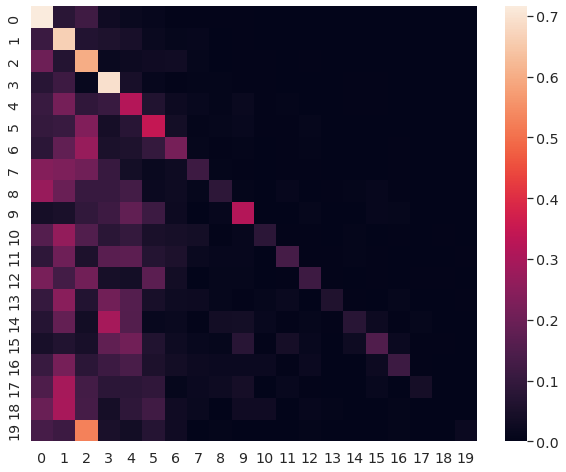

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
show_eval_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.35      0.45      0.39      2290
           1       0.32      0.33      0.33      2200
           2       0.30      0.31      0.31      1705
           3       0.38      0.43      0.41      1400
           4       0.18      0.16      0.17      1076
           5       0.20      0.17      0.18       805
           6       0.19      0.14      0.16       672
           7       0.13      0.14      0.14       591
           8       0.13      0.10      0.11       499
           9       0.17      0.10      0.13       360
          10       0.09      0.08      0.09       319
          11       0.15      0.12      0.13       293
          12       0.13      0.09      0.11       206
          13       0.13      0.13      0.13       215
          14       0.09      0.08      0.08       207
          15       0.12      0.07      0.09       193
          16       0.11      0.07      0.09       203
          17       0.10    

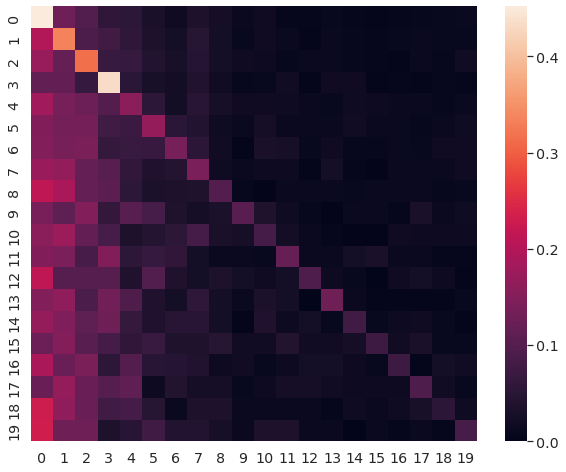

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric='cosine')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
show_eval_report(y_test, y_pred)

## Catboost + rubert-tiny2 sentense embeddings

### Installation and import

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.1 MB/s eta 0:00:00


In [ ]:
from catboost import Pool, CatBoostClassifier

### Data preprocessing

In [ ]:
embeddings = pd.read_csv(os.path.join(WORKING_DIRECTORY, "embeddings.csv"))

In [ ]:
df = data.join(embeddings)

Split data into train, validation and test sets

In [ ]:
X = df.iloc[:, 1:]
y = df["id"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

Create training and validation Pools

In [ ]:
train_pool = Pool(X_train, 
                  y_train, 
                  text_features=["text"], 
                  feature_names=list(X_train.columns))

valid_pool = Pool(X_val, 
                  y_val, 
                  text_features=["text"], 
                  feature_names=list(X_val.columns))

###Model training

Initialize tokenizers

In [ ]:
space_tokenizer = {"tokenizer_id" : "Space",
                   "separator_type" : "ByDelimiter",
                   "delimiter" : " ",}

sense_tokenizer = {"tokenizer_id" : "Sense",
                   "separator_type" : "BySense",
                   "languages" : ["russian"]}

sense_tokenizer_punct_num = {"tokenizer_id" : "SensePunctNum",
                             "separator_type" : "BySense",
                             "token_types": ["Number", "Punctuation", "SentenceBreak"],
                             "languages" : ["russian"]}

tokenizers = [space_tokenizer, sense_tokenizer, sense_tokenizer_punct_num]

Create dictionaries with different ranges of n-grams

In [ ]:
dictionaries = []
dictionaries_names = []

for i in range(6):
  dict_name = f"{i + 1}_letters"
  dictionary = {"dictionary_id": dict_name,
                "token_level_type": "Letter",
                "gram_order" : str(i + 1)}
  dictionaries.append(dictionary)
  dictionaries_names.append(dict_name)

for i in range(3):
  dict_name = f"{i + 1}_words"
  dictionary = {"dictionary_id": dict_name,
                "token_level_type": "Word",
                "gram_order" : str(i + 1)}
  dictionaries.append(dictionary)
  dictionaries_names.append(dict_name)

Add dictionaries with different skip steps

In [ ]:
skip_dictionaries = []
for dict_ in dictionaries:
  if int(dict_["gram_order"]) > 1:
    for skip_step in range(1, 3):
      skip_dictionary = dict_.copy()
      skip_dictionary["dictionary_id"] = f"{skip_dictionary['dictionary_id']}_skip_{skip_step}"
      skip_dictionary["skip_step"] = str(skip_step)
      skip_dictionaries.append(skip_dictionary)

dictionaries.extend(skip_dictionaries)

Combine all text processing steps

In [ ]:
feature_processing = {"default" : [{"dictionaries_names" : dictionaries_names,
                                    "feature_calcers" : ["BoW", "NaiveBayes", "BM25"],
                                    "tokenizers_names" : ["Space", "Sense", "SensePunctNum"]}]}


text_processing = {"tokenizers": tokenizers, 
                   "dictionaries": dictionaries,  
                   "feature_processing": feature_processing}

text_processing

{'tokenizers': [{'tokenizer_id': 'Space',
   'separator_type': 'ByDelimiter',
   'delimiter': ' '},
  {'tokenizer_id': 'Sense',
   'separator_type': 'BySense',
   'languages': ['russian']},
  {'tokenizer_id': 'SensePunctNum',
   'separator_type': 'BySense',
   'token_types': ['Number', 'Punctuation', 'SentenceBreak'],
   'languages': ['russian']}],
 'dictionaries': [{'dictionary_id': '1_letters',
   'token_level_type': 'Letter',
   'gram_order': '1'},
  {'dictionary_id': '2_letters',
   'token_level_type': 'Letter',
   'gram_order': '2'},
  {'dictionary_id': '3_letters',
   'token_level_type': 'Letter',
   'gram_order': '3'},
  {'dictionary_id': '4_letters',
   'token_level_type': 'Letter',
   'gram_order': '4'},
  {'dictionary_id': '5_letters',
   'token_level_type': 'Letter',
   'gram_order': '5'},
  {'dictionary_id': '6_letters',
   'token_level_type': 'Letter',
   'gram_order': '6'},
  {'dictionary_id': '1_words', 'token_level_type': 'Word', 'gram_order': '1'},
  {'dictionary_id': 

In [ ]:
cat_clf = CatBoostClassifier(task_type="GPU" if torch.cuda.is_available() else "CPU",
                             iterations=10_000,
                             od_type = "Iter",
                             od_wait = 500,
                             eval_metric="TotalF1",
                             random_seed = SEED,
                             text_processing = text_processing)

In [ ]:
cat_clf.fit(train_pool,
            verbose=100,
            eval_set=valid_pool,
            use_best_model=True)

Learning rate set to 0.056337
0:	learn: 0.4512830	test: 0.4667999	best: 0.4667999 (0)	total: 418ms	remaining: 1h 9m 38s
100:	learn: 0.6567681	test: 0.6874400	best: 0.6874400 (100)	total: 35.9s	remaining: 58m 42s
200:	learn: 0.6932888	test: 0.7204531	best: 0.7204531 (200)	total: 1m 10s	remaining: 57m 25s
300:	learn: 0.7157686	test: 0.7363988	best: 0.7363988 (300)	total: 1m 44s	remaining: 56m 3s
400:	learn: 0.7306347	test: 0.7423757	best: 0.7425625 (399)	total: 2m 13s	remaining: 53m 21s
500:	learn: 0.7396410	test: 0.7483225	best: 0.7485210 (498)	total: 2m 41s	remaining: 51m 6s
600:	learn: 0.7463628	test: 0.7513131	best: 0.7513131 (600)	total: 3m 9s	remaining: 49m 19s
700:	learn: 0.7508414	test: 0.7529127	best: 0.7536390 (676)	total: 3m 35s	remaining: 47m 42s
800:	learn: 0.7556030	test: 0.7548040	best: 0.7549937 (794)	total: 4m 1s	remaining: 46m 13s
900:	learn: 0.7593472	test: 0.7576282	best: 0.7576282 (900)	total: 4m 27s	remaining: 45m 3s
1000:	learn: 0.7627983	test: 0.7580870	best: 0.75

### Model saving

In [ ]:
cat_clf.save_model(fname=os.path.join(WORKING_DIRECTORY, "cat_clf_embed"),
                   export_parameters=None,
                   pool=train_pool)

In [ ]:
cat_clf = CatBoostClassifier()
cat_clf.load_model(os.path.join(WORKING_DIRECTORY, "cat_clf_embed"))

### Model evaluation

In [ ]:
y_pred = cat_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2290
           1       0.83      0.90      0.87      2200
           2       0.75      0.84      0.79      1705
           3       0.92      0.96      0.94      1400
           4       0.70      0.77      0.73      1076
           5       0.86      0.88      0.87       805
           6       0.59      0.55      0.57       672
           7       0.80      0.69      0.74       591
           8       0.74      0.66      0.70       499
           9       0.73      0.70      0.72       360
          10       0.66      0.59      0.62       319
          11       0.67      0.57      0.61       293
          12       0.68      0.61      0.64       206
          13       0.89      0.72      0.79       215
          14       0.67      0.65      0.66       207
          15       0.65      0.54      0.59       193
          16       0.72      0.56      0.63       203
          17       0.72    

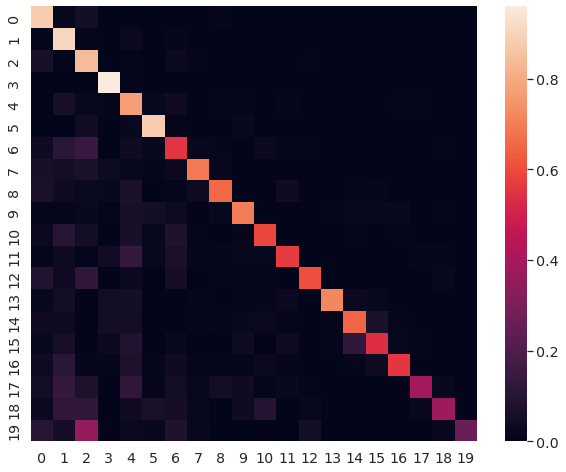

In [ ]:
show_eval_report(y_test, y_pred)